<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

C:\Users\Dell\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Dell\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df0 = pd.read_csv("Churn_Modelling.csv")
df = df0.copy()

In [3]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8988,8989,15812279,William,634,France,Male,37,5,115345.860,2,0,0,168781.800,0
40,41,15619360,Hsiao,472,Spain,Male,40,4,0.000,1,1,0,70154.220,0
1354,1355,15683403,Lombardi,611,Spain,Male,52,7,0.000,1,0,1,73585.180,1
6495,6496,15640852,McGregor,617,Germany,Female,39,5,83348.890,3,1,0,7953.620,1
1652,1653,15675501,Woods,616,France,Male,59,5,153861.100,1,1,1,17699.480,0
9879,9880,15669414,Pisano,486,Germany,Male,62,9,118356.890,2,1,0,168034.830,1
5543,5544,15585777,Pai,710,France,Male,38,3,130588.820,1,1,1,154997.640,0
4895,4896,15589435,Davide,784,France,Male,31,7,0.000,2,1,1,143204.410,0
283,284,15699389,Ch'ien,807,France,Male,42,7,118274.710,1,1,1,25885.720,0
5269,5270,15732281,Ugoji,680,Germany,Male,34,6,146422.220,1,1,0,67142.970,1


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.shape

(10000, 14)

In [5]:
df.Surname.nunique()

2932

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum().any()

False

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [11]:
df.shape

(10000, 11)

0    7963
1    2037
Name: Exited, dtype: int64

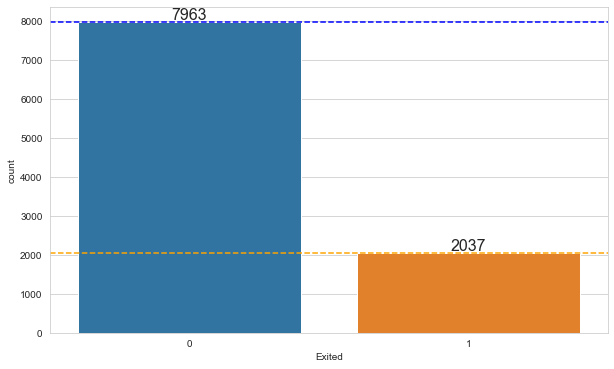

In [12]:
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');

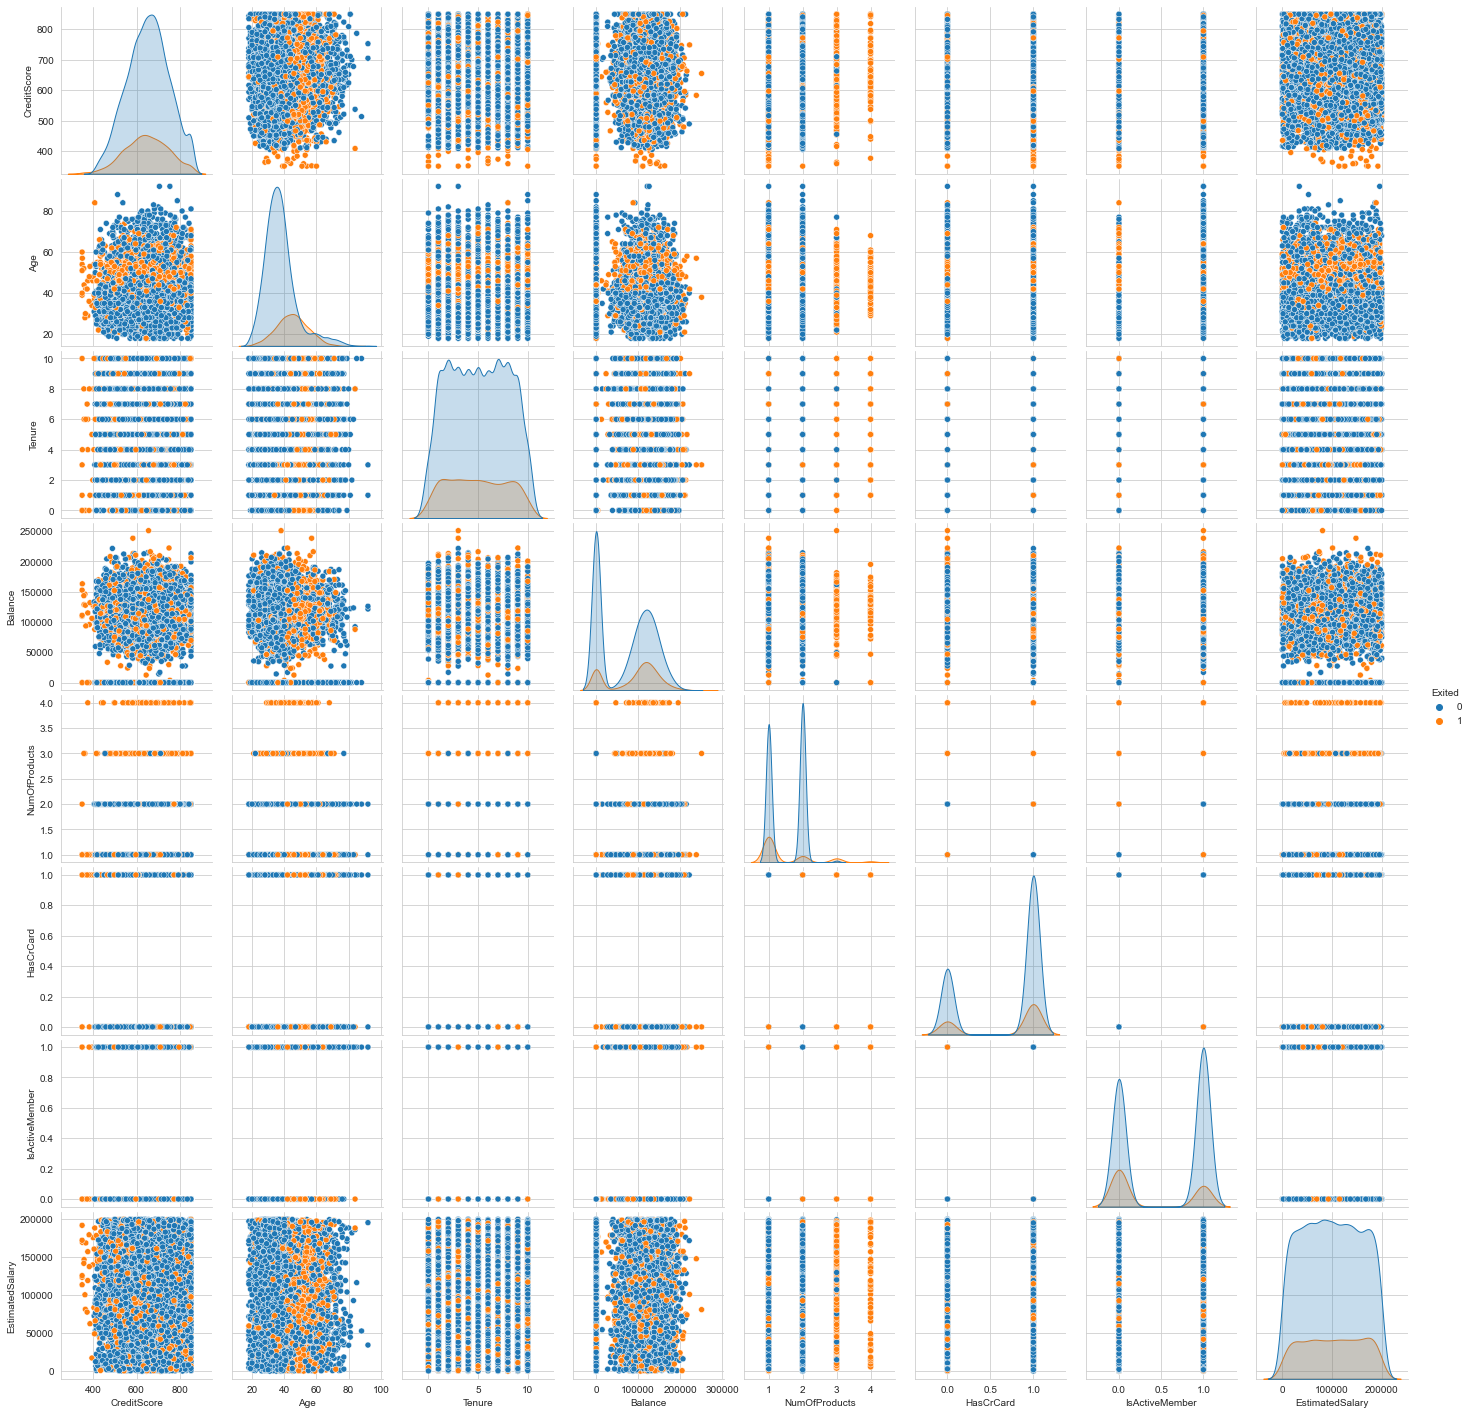

In [13]:
sns.pairplot(df, hue= "Exited")

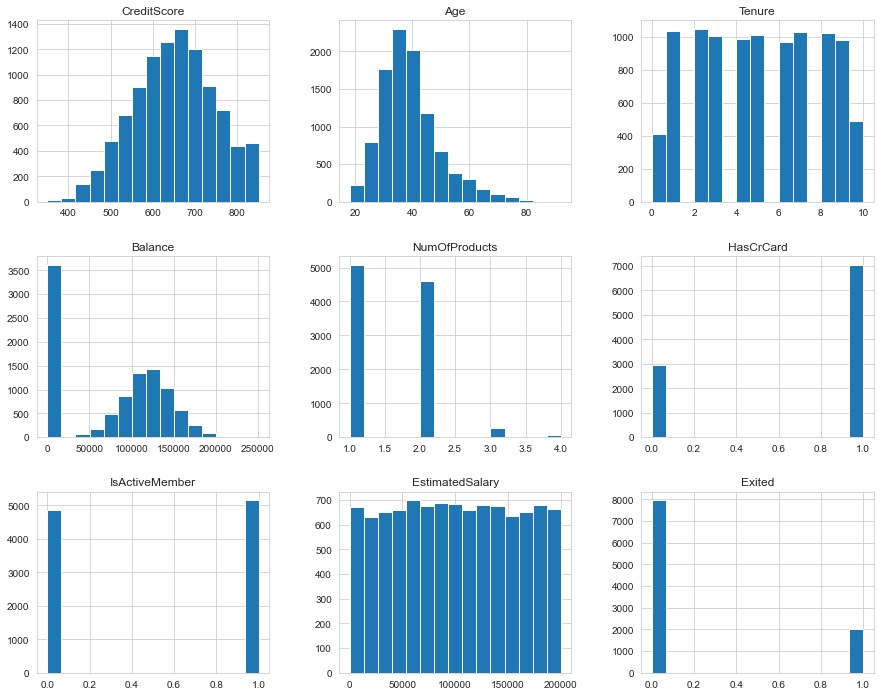

In [14]:
df.hist(figsize=(15, 12), bins=15);

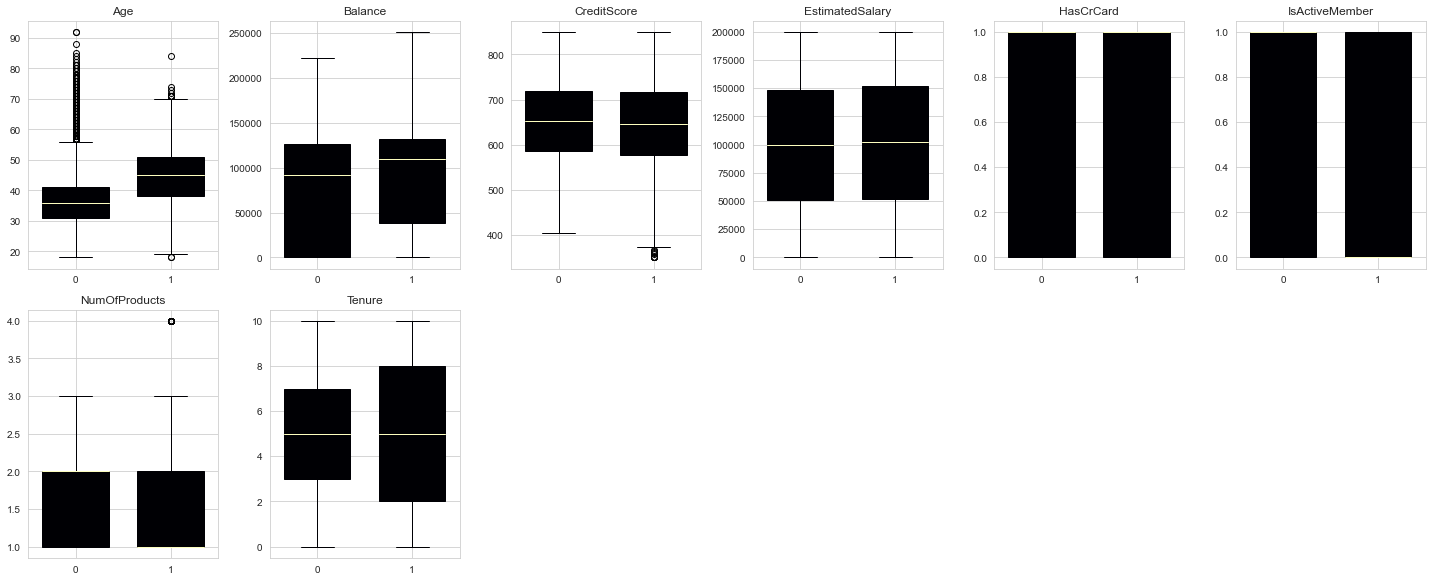

In [15]:
df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

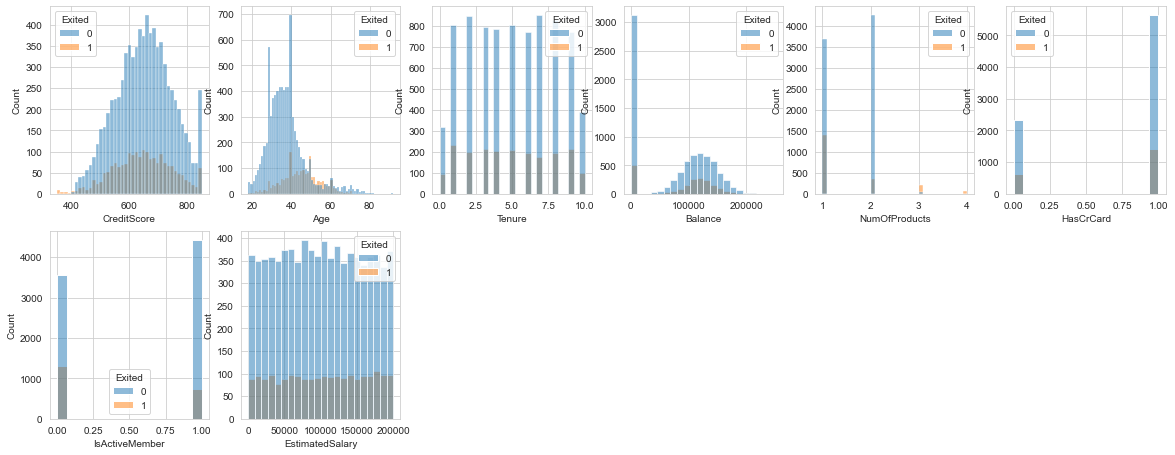

In [16]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')

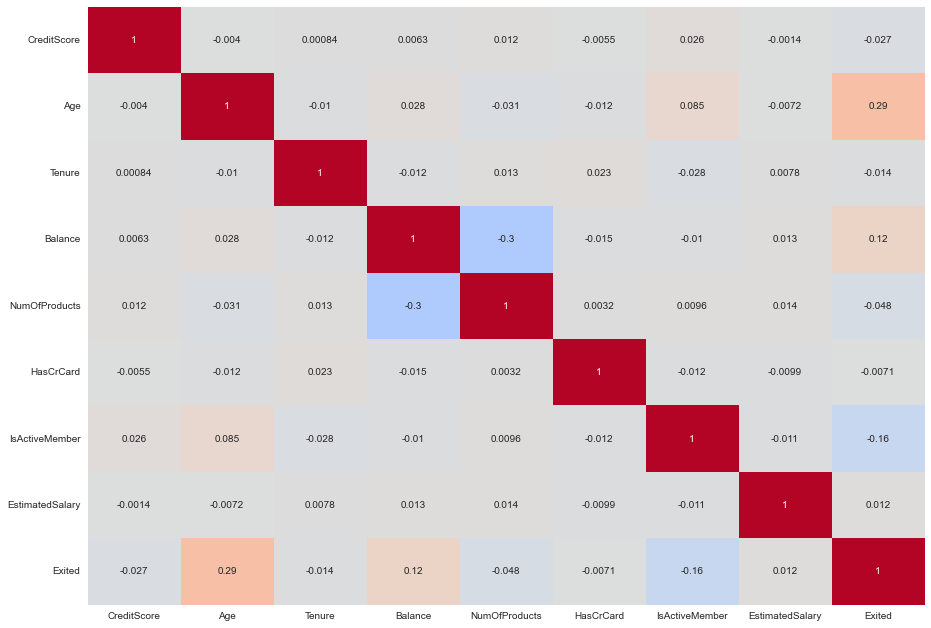

In [17]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False) #numeric_only=True
plt.show()

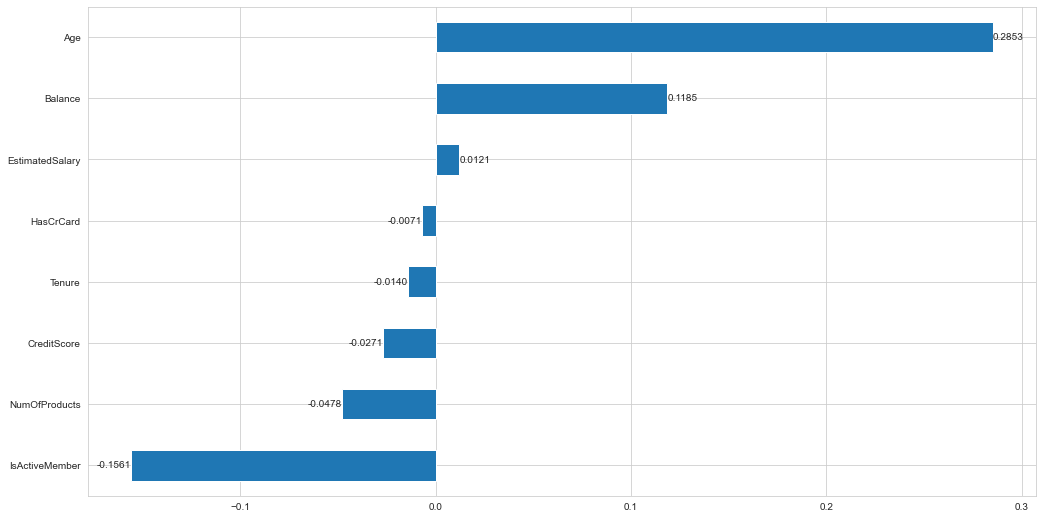

In [18]:
plt.figure(figsize=(17, 9))
ax = df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

In [19]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [20]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [22]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [24]:
scaler = MinMaxScaler()
# scaler = RobustScaler()

In [25]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [27]:
X_train.shape

(9000, 11)

In [28]:
X_test.shape

(1000, 11)

In [29]:
model = Sequential()

model.add(Dense(32, activation = "relu"))  # sigunt ve hiperb. e göre öğrenme daha fazla olduğu için relu kullandık.
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  # output binary olduğu için sigmoid kullandık. 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [30]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [31]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4988 - accuracy: 0.7923 - val_loss: 0.4488 - val_accuracy: 0.8044
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4560 - accuracy: 0.8041 - val_loss: 0.4234 - val_accuracy: 0.8233
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.8131 - val_loss: 0.4051 - val_accuracy: 0.8311
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4186 - accuracy: 0.8188 - val_loss: 0.3770 - val_accuracy: 0.8478
Epoch 5/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3988 - accuracy: 0.8286 - val_loss: 0.3542 - val_accuracy: 0.8589
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3839 - accuracy: 0.8347 - val_loss: 0.3470 - val_accuracy: 0.8756
Epoch 7/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3749 - accuracy: 0.8404 - val_loss: 0.3296 - val_accuracy:

254/254 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8596 - val_loss: 0.2990 - val_accuracy: 0.8756
Epoch 57: early stopping


# The Evaluation of Model with Default Parameters (without class_weigth)

In [32]:
model.summary()

# 1000 x 15 iterasyon oldu.
# her iterasyonda 1231 tane parametre güncellemesi yapıldı.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.499,0.792,0.449,0.804
1,0.456,0.804,0.423,0.823
2,0.437,0.813,0.405,0.831
3,0.419,0.819,0.377,0.848
4,0.399,0.829,0.354,0.859


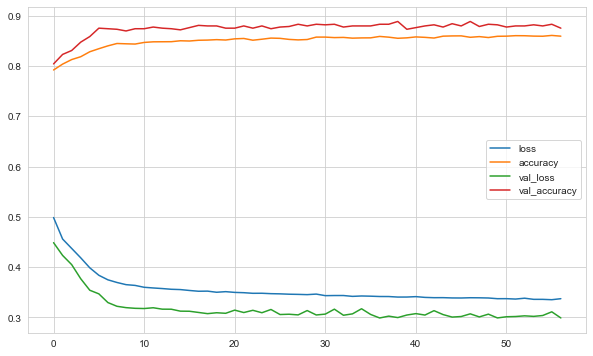

In [34]:
loss_df.plot();

In [35]:
model.evaluate(X_test, y_test, verbose=0)

[0.34080255031585693, 0.8569999933242798]

In [36]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34080255031585693
accuracy :  0.8569999933242798


In [37]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")   # 1 olma ihtimali 0.5 ten büyükse 1 yap
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[766  30]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.75      0.45      0.56       204

    accuracy                           0.86      1000
   macro avg       0.81      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [38]:
from sklearn.utils import class_weight

In [39]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)

In [40]:
model_weighted = Sequential()

model_weighted.add(Dense(32, activation = "relu"))  
model_weighted.add(Dense(16, activation = "relu"))
model_weighted.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.005)

model_weighted.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [41]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [42]:
model_weighted.fit(x = X_train, y = y_train, 
                   validation_split = 0.1, 
                   batch_size = 32, 
                   epochs = 1000, 
                   verbose=1, 
                   callbacks = [early_stop], 
                   )

Epoch 1/1000
254/254 [==============================] - 2s 3ms/step - loss: 0.4690 - accuracy: 0.7958 - val_loss: 0.4076 - val_accuracy: 0.8356
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4187 - accuracy: 0.8244 - val_loss: 0.3438 - val_accuracy: 0.8733
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3777 - accuracy: 0.8422 - val_loss: 0.3220 - val_accuracy: 0.8778
Epoch 4/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3693 - accuracy: 0.8467 - val_loss: 0.3120 - val_accuracy: 0.8833
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8496 - val_loss: 0.3275 - val_accuracy: 0.8833
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3590 - accuracy: 0.8478 - val_loss: 0.3022 - val_accuracy: 0.8844
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3560 - accuracy: 0.8528 - val_loss: 0.3024 - val_accuracy:

In [43]:
## classification problemlerinde özellikle imbalanced datalarda validation_split kullanmak bizim kötü skorlar almamıza neden
# olabilir . Bundan dolayı validation_data belirlememiz gerekiyor.

In [44]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.

X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve validation datasını ayırdık.

In [45]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [46]:
# biz normalde modelin mimarisini her kurduğumuzda random olarak ağırlıkları ve bias'leri atıyor ama biz şimdi 
# bazı kavramlar göreceğiz onların farklarını görebilmek için 
# tf.keras.utils.set_random_seed(seed)  ile model her çalıştığında aynı ağırlıkları atasın istiyorum.

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer. 
model.add(Dense(1, activation = "sigmoid"))

# targetımız binary bir yapıda olduğundan  output layerda 1  nöron olacak şekilde mimamirizi oluşturuyoruz.
# activation = "sigmoid" yazdığımıza dikkat edelim hiçbir şey yazmazsak defatulu linear'di hatırlarsak.

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


# problemimiz classification problemi olduğundan loss = "binary_crossentropy" yapıyoruz .
# optimizer hyperparametresi ağırlıkları güncellerken ; 
# hangi gradient descent türünü kullanmak istediğimizle alakalıdır 'rmsprop' gibi "adam" gibi optimizer çeşitlerini deneyerek
# en iyi sonucu hangisi veriyorsa yola onunla devam etmemiz gerekir burada optimizer türü datadan dataya göre farklılık gösterir
#metrics=["accuracy"] ile, modelin accuracy'sinin de takip edilebileceğini belirtiyoruz.
# Bu, eğitim sırasında modelin accuracy'sini de izlememize olanak sağlar.

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 36)                432       
                                                                 
 dense_7 (Dense)             (None, 18)                666       
                                                                 
 dense_8 (Dense)             (None, 9)                 171       
                                                                 
 dense_9 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(11, 36) dtype=float32, numpy=
 array([[-0.10538301, -0.22507396,  0.06228065,  0.05208239, -0.01011613,
          0.30637676, -0.11798656,  0.09649941,  0.07309225, -0.18225348,
          0.11710039, -0.3022454 , -0.1987675 ,  0.06009087, -0.02441636,
         -0.303414  ,  0.25129515,  0.25352234,  0.03389981,  0.3025177 ,
         -0.08818358,  0.23076528,  0.19438511,  0.21460086,  0.12154928,
         -0.004637  , -0.00051042,  0.01055247,  0.16332412,  0.08044785,
          0.3392827 , -0.07059586,  0.15546948,  0.04182559,  0.24829763,
         -0.11789465],
        [-0.03308919, -0.27954468,  0.28248042,  0.04915249,  0.07716718,
         -0.00949505, -0.02792728,  0.2243833 , -0.13666311, -0.05743656,
         -0.00220945, -0.03526756,  0.07883188, -0.07485056,  0.16445208,
         -0.04530209,  0.15430874, -0.07559466,  0.09532282,  0.06458986,
         -0.306117  ,  0.10299465, -0.08373022,  0.23677087, -0.17811073,
         -0.0166528

In [49]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          verbose=1)


#  validation_data=(X_val, y_val) yukarıda ayırdığımız validation datasını kullanıyoruz.

Epoch 1/600
254/254 [==============================] - 2s 4ms/step - loss: 0.5062 - accuracy: 0.7949 - val_loss: 0.4599 - val_accuracy: 0.8000
Epoch 2/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4473 - accuracy: 0.8080 - val_loss: 0.4289 - val_accuracy: 0.8122
Epoch 3/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8272 - val_loss: 0.4010 - val_accuracy: 0.8378
Epoch 4/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3771 - accuracy: 0.8417 - val_loss: 0.3774 - val_accuracy: 0.8500
Epoch 5/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3662 - accuracy: 0.8460 - val_loss: 0.3767 - val_accuracy: 0.8556
Epoch 6/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3596 - accuracy: 0.8505 - val_loss: 0.3721 - val_accuracy: 0.8556
Epoch 7/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3546 - accuracy: 0.8514 - val_loss: 0.3779 - val_accuracy: 0.8478

Epoch 58/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3190 - accuracy: 0.8696 - val_loss: 0.3707 - val_accuracy: 0.8500
Epoch 59/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3183 - accuracy: 0.8681 - val_loss: 0.3596 - val_accuracy: 0.8478
Epoch 60/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.8679 - val_loss: 0.3759 - val_accuracy: 0.8489
Epoch 61/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3169 - accuracy: 0.8699 - val_loss: 0.3595 - val_accuracy: 0.8578
Epoch 62/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3185 - accuracy: 0.8683 - val_loss: 0.3535 - val_accuracy: 0.8589
Epoch 63/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3170 - accuracy: 0.8691 - val_loss: 0.3609 - val_accuracy: 0.8578
Epoch 64/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.8702 - val_loss: 0.3567 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3077 - accuracy: 0.8732 - val_loss: 0.3694 - val_accuracy: 0.8644
Epoch 116/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3069 - accuracy: 0.8720 - val_loss: 0.3615 - val_accuracy: 0.8522
Epoch 117/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3059 - accuracy: 0.8719 - val_loss: 0.3647 - val_accuracy: 0.8467
Epoch 118/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3062 - accuracy: 0.8731 - val_loss: 0.3719 - val_accuracy: 0.8489
Epoch 119/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3038 - accuracy: 0.8722 - val_loss: 0.3689 - val_accuracy: 0.8500
Epoch 120/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3046 - accuracy: 0.8730 - val_loss: 0.3631 - val_accuracy: 0.8544
Epoch 121/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3057 - accuracy: 0.8728 - val_loss: 0.3641 - val_ac

254/254 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.8769 - val_loss: 0.3742 - val_accuracy: 0.8556
Epoch 172/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2979 - accuracy: 0.8758 - val_loss: 0.3811 - val_accuracy: 0.8611
Epoch 173/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.8767 - val_loss: 0.3746 - val_accuracy: 0.8478
Epoch 174/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2976 - accuracy: 0.8770 - val_loss: 0.3809 - val_accuracy: 0.8556
Epoch 175/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2973 - accuracy: 0.8790 - val_loss: 0.3912 - val_accuracy: 0.8433
Epoch 176/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2978 - accuracy: 0.8760 - val_loss: 0.3806 - val_accuracy: 0.8500
Epoch 177/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2995 - accuracy: 0.8769 - val_loss: 0.3715 - val_accuracy: 0.8567

254/254 [==============================] - 1s 3ms/step - loss: 0.2901 - accuracy: 0.8812 - val_loss: 0.3830 - val_accuracy: 0.8511
Epoch 228/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2880 - accuracy: 0.8835 - val_loss: 0.3856 - val_accuracy: 0.8544
Epoch 229/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2896 - accuracy: 0.8822 - val_loss: 0.3898 - val_accuracy: 0.8500
Epoch 230/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2890 - accuracy: 0.8819 - val_loss: 0.3873 - val_accuracy: 0.8478
Epoch 231/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2909 - accuracy: 0.8804 - val_loss: 0.3913 - val_accuracy: 0.8556
Epoch 232/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2886 - accuracy: 0.8823 - val_loss: 0.3844 - val_accuracy: 0.8511
Epoch 233/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2877 - accuracy: 0.8814 - val_loss: 0.3914 - val_accuracy: 0.8500

254/254 [==============================] - 1s 4ms/step - loss: 0.2820 - accuracy: 0.8835 - val_loss: 0.3962 - val_accuracy: 0.8433
Epoch 284/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2819 - accuracy: 0.8819 - val_loss: 0.3980 - val_accuracy: 0.8511
Epoch 285/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2818 - accuracy: 0.8835 - val_loss: 0.3914 - val_accuracy: 0.8544
Epoch 286/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2816 - accuracy: 0.8841 - val_loss: 0.3967 - val_accuracy: 0.8433
Epoch 287/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.8846 - val_loss: 0.3941 - val_accuracy: 0.8489
Epoch 288/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2833 - accuracy: 0.8819 - val_loss: 0.3902 - val_accuracy: 0.8533
Epoch 289/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.8817 - val_loss: 0.3926 - val_accuracy: 0.8556

254/254 [==============================] - 1s 3ms/step - loss: 0.2749 - accuracy: 0.8847 - val_loss: 0.4076 - val_accuracy: 0.8456
Epoch 340/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2766 - accuracy: 0.8837 - val_loss: 0.4083 - val_accuracy: 0.8489
Epoch 341/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2757 - accuracy: 0.8863 - val_loss: 0.4106 - val_accuracy: 0.8478
Epoch 342/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2745 - accuracy: 0.8868 - val_loss: 0.4065 - val_accuracy: 0.8500
Epoch 343/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2773 - accuracy: 0.8869 - val_loss: 0.4075 - val_accuracy: 0.8511
Epoch 344/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2744 - accuracy: 0.8856 - val_loss: 0.4040 - val_accuracy: 0.8433
Epoch 345/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2745 - accuracy: 0.8865 - val_loss: 0.4077 - val_accuracy: 0.8544

254/254 [==============================] - 1s 3ms/step - loss: 0.2691 - accuracy: 0.8877 - val_loss: 0.4267 - val_accuracy: 0.8411
Epoch 396/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2681 - accuracy: 0.8896 - val_loss: 0.4224 - val_accuracy: 0.8456
Epoch 397/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2679 - accuracy: 0.8894 - val_loss: 0.4282 - val_accuracy: 0.8489
Epoch 398/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2681 - accuracy: 0.8891 - val_loss: 0.4281 - val_accuracy: 0.8433
Epoch 399/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2675 - accuracy: 0.8894 - val_loss: 0.4376 - val_accuracy: 0.8422
Epoch 400/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2698 - accuracy: 0.8880 - val_loss: 0.4280 - val_accuracy: 0.8456
Epoch 401/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2671 - accuracy: 0.8898 - val_loss: 0.4248 - val_accuracy: 0.8500

254/254 [==============================] - 1s 4ms/step - loss: 0.2593 - accuracy: 0.8942 - val_loss: 0.4527 - val_accuracy: 0.8389
Epoch 452/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2618 - accuracy: 0.8917 - val_loss: 0.4425 - val_accuracy: 0.8422
Epoch 453/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2616 - accuracy: 0.8910 - val_loss: 0.4371 - val_accuracy: 0.8467
Epoch 454/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2605 - accuracy: 0.8920 - val_loss: 0.4396 - val_accuracy: 0.8422
Epoch 455/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2615 - accuracy: 0.8915 - val_loss: 0.4347 - val_accuracy: 0.8467
Epoch 456/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2616 - accuracy: 0.8914 - val_loss: 0.4442 - val_accuracy: 0.8411
Epoch 457/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2620 - accuracy: 0.8932 - val_loss: 0.4469 - val_accuracy: 0.8411

254/254 [==============================] - 1s 4ms/step - loss: 0.2587 - accuracy: 0.8905 - val_loss: 0.4724 - val_accuracy: 0.8333
Epoch 508/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2570 - accuracy: 0.8928 - val_loss: 0.4528 - val_accuracy: 0.8489
Epoch 509/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2590 - accuracy: 0.8901 - val_loss: 0.4770 - val_accuracy: 0.8344
Epoch 510/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2542 - accuracy: 0.8951 - val_loss: 0.4565 - val_accuracy: 0.8456
Epoch 511/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2540 - accuracy: 0.8933 - val_loss: 0.4588 - val_accuracy: 0.8422
Epoch 512/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2547 - accuracy: 0.8935 - val_loss: 0.4613 - val_accuracy: 0.8444
Epoch 513/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2566 - accuracy: 0.8932 - val_loss: 0.4639 - val_accuracy: 0.8367

254/254 [==============================] - 1s 3ms/step - loss: 0.2500 - accuracy: 0.8964 - val_loss: 0.4780 - val_accuracy: 0.8389
Epoch 564/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2531 - accuracy: 0.8937 - val_loss: 0.4609 - val_accuracy: 0.8444
Epoch 565/600
254/254 [==============================] - 1s 3ms/step - loss: 0.2540 - accuracy: 0.8932 - val_loss: 0.5013 - val_accuracy: 0.8278
Epoch 566/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2489 - accuracy: 0.8952 - val_loss: 0.4688 - val_accuracy: 0.8478
Epoch 567/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2508 - accuracy: 0.8933 - val_loss: 0.4781 - val_accuracy: 0.8400
Epoch 568/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2505 - accuracy: 0.8943 - val_loss: 0.4692 - val_accuracy: 0.8367
Epoch 569/600
254/254 [==============================] - 1s 4ms/step - loss: 0.2506 - accuracy: 0.8956 - val_loss: 0.4716 - val_accuracy: 0.8422

In [50]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.506,0.795,0.460,0.800
1,0.447,0.808,0.429,0.812
2,0.409,0.827,0.401,0.838
3,0.377,0.842,0.377,0.850
4,0.366,0.846,0.377,0.856


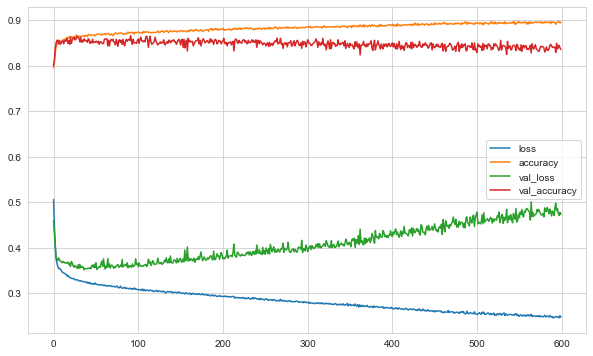

In [51]:
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10) iceriye
plt.show()

In [52]:
model.evaluate(X_test, y_test, verbose=0)

[0.47496262192726135, 0.8429999947547913]

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [53]:
model_weighted.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                384       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [54]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.469,0.796,0.408,0.836
1,0.419,0.824,0.344,0.873
2,0.378,0.842,0.322,0.878
3,0.369,0.847,0.312,0.883
4,0.363,0.850,0.327,0.883


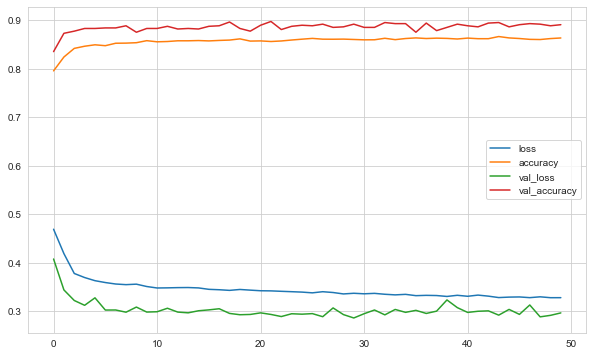

In [55]:
loss_df.plot();

In [56]:
model_weighted.evaluate(X_test, y_test, verbose=0)

[0.31329506635665894, 0.8709999918937683]

In [57]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.31329506635665894
accuracy :  0.8709999918937683


In [58]:
y_pred = (model_weighted.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[772  24]
 [105  99]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       796
           1       0.80      0.49      0.61       204

    accuracy                           0.87      1000
   macro avg       0.84      0.73      0.76      1000
weighted avg       0.86      0.87      0.86      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [59]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.009)

# optimizer'ı compile'a string olarak verdiğimizde "adam" gibi ; bu default learning rate kullanacağım demektir bunu değiştirmek
# istiyorsak opt = Adam(learning_rate=  0.005) bu şekilde tanımlayıp içerisine istediğimiz lr oranını yazıp
# ardından compile satırına  bunu tanımlıyoruz :



model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [60]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [61]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 2s 4ms/step - loss: 0.4689 - accuracy: 0.7974 - val_loss: 0.4303 - val_accuracy: 0.8189
Epoch 2/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8291 - val_loss: 0.3938 - val_accuracy: 0.8422
Epoch 3/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3739 - accuracy: 0.8441 - val_loss: 0.3890 - val_accuracy: 0.8400
Epoch 4/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3613 - accuracy: 0.8499 - val_loss: 0.4052 - val_accuracy: 0.8389
Epoch 5/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3587 - accuracy: 0.8532 - val_loss: 0.3831 - val_accuracy: 0.8522
Epoch 6/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3545 - accuracy: 0.8535 - val_loss: 0.3910 - val_accuracy: 0.8511
Epoch 7/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8548 - val_loss: 0.3813 - val_accuracy: 0.8522

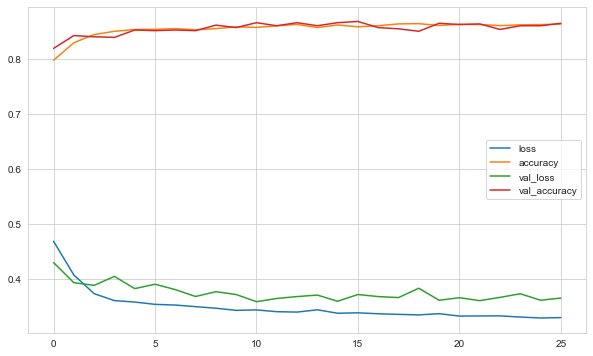

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [63]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3301587700843811
accuracy :  0.8679999709129333


In [64]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[772  24]
 [108  96]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       796
           1       0.80      0.47      0.59       204

    accuracy                           0.87      1000
   macro avg       0.84      0.72      0.76      1000
weighted avg       0.86      0.87      0.85      1000



### Add Dropout Layer

In [65]:
from tensorflow.keras.layers import Dropout

In [66]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [67]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
)

Epoch 1/600
254/254 [==============================] - 2s 4ms/step - loss: 0.6481 - accuracy: 0.6852 - val_loss: 0.5337 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 1s 4ms/step - loss: 0.5429 - accuracy: 0.7911 - val_loss: 0.4973 - val_accuracy: 0.7967
Epoch 3/600
254/254 [==============================] - 1s 4ms/step - loss: 0.5265 - accuracy: 0.7956 - val_loss: 0.4854 - val_accuracy: 0.7967
Epoch 4/600
254/254 [==============================] - 1s 4ms/step - loss: 0.5091 - accuracy: 0.7965 - val_loss: 0.4719 - val_accuracy: 0.7967
Epoch 5/600
254/254 [==============================] - 1s 5ms/step - loss: 0.5026 - accuracy: 0.7958 - val_loss: 0.4677 - val_accuracy: 0.7967
Epoch 6/600
254/254 [==============================] - 1s 5ms/step - loss: 0.4961 - accuracy: 0.7958 - val_loss: 0.4647 - val_accuracy: 0.7967
Epoch 7/600
254/254 [==============================] - 1s 4ms/step - loss: 0.4904 - accuracy: 0.7960 - val_loss: 0.4605 - val_accuracy: 0.7967

Epoch 58/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3927 - accuracy: 0.8377 - val_loss: 0.3679 - val_accuracy: 0.8567
Epoch 59/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3889 - accuracy: 0.8377 - val_loss: 0.3671 - val_accuracy: 0.8556
Epoch 60/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3949 - accuracy: 0.8363 - val_loss: 0.3713 - val_accuracy: 0.8533
Epoch 61/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3903 - accuracy: 0.8377 - val_loss: 0.3731 - val_accuracy: 0.8544
Epoch 62/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3931 - accuracy: 0.8380 - val_loss: 0.3737 - val_accuracy: 0.8600
Epoch 63/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3931 - accuracy: 0.8375 - val_loss: 0.3706 - val_accuracy: 0.8544
Epoch 64/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3953 - accuracy: 0.8383 - val_loss: 0.3670 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3834 - accuracy: 0.8431 - val_loss: 0.3606 - val_accuracy: 0.8600
Epoch 116/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3868 - accuracy: 0.8378 - val_loss: 0.3608 - val_accuracy: 0.8600
Epoch 117/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3870 - accuracy: 0.8400 - val_loss: 0.3596 - val_accuracy: 0.8611
Epoch 118/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3830 - accuracy: 0.8446 - val_loss: 0.3611 - val_accuracy: 0.8578
Epoch 119/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3818 - accuracy: 0.8426 - val_loss: 0.3626 - val_accuracy: 0.8578
Epoch 120/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3848 - accuracy: 0.8393 - val_loss: 0.3629 - val_accuracy: 0.8589
Epoch 121/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3876 - accuracy: 0.8415 - val_loss: 0.3600 - val_ac

254/254 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8414 - val_loss: 0.3599 - val_accuracy: 0.8578
Epoch 172/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3830 - accuracy: 0.8441 - val_loss: 0.3561 - val_accuracy: 0.8589
Epoch 173/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3832 - accuracy: 0.8437 - val_loss: 0.3554 - val_accuracy: 0.8544
Epoch 174/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3802 - accuracy: 0.8460 - val_loss: 0.3542 - val_accuracy: 0.8567
Epoch 175/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3801 - accuracy: 0.8393 - val_loss: 0.3602 - val_accuracy: 0.8556
Epoch 176/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3837 - accuracy: 0.8426 - val_loss: 0.3600 - val_accuracy: 0.8544
Epoch 177/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3821 - accuracy: 0.8402 - val_loss: 0.3554 - val_accuracy: 0.8611

254/254 [==============================] - 1s 4ms/step - loss: 0.3789 - accuracy: 0.8431 - val_loss: 0.3535 - val_accuracy: 0.8611
Epoch 228/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3819 - accuracy: 0.8428 - val_loss: 0.3540 - val_accuracy: 0.8522
Epoch 229/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3876 - accuracy: 0.8375 - val_loss: 0.3534 - val_accuracy: 0.8589
Epoch 230/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3849 - accuracy: 0.8395 - val_loss: 0.3496 - val_accuracy: 0.8578
Epoch 231/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3773 - accuracy: 0.8451 - val_loss: 0.3502 - val_accuracy: 0.8556
Epoch 232/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3792 - accuracy: 0.8409 - val_loss: 0.3500 - val_accuracy: 0.8622
Epoch 233/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3774 - accuracy: 0.8436 - val_loss: 0.3506 - val_accuracy: 0.8644

254/254 [==============================] - 1s 3ms/step - loss: 0.3756 - accuracy: 0.8441 - val_loss: 0.3501 - val_accuracy: 0.8567
Epoch 284/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3726 - accuracy: 0.8481 - val_loss: 0.3504 - val_accuracy: 0.8633
Epoch 285/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3778 - accuracy: 0.8449 - val_loss: 0.3521 - val_accuracy: 0.8633
Epoch 286/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3813 - accuracy: 0.8441 - val_loss: 0.3506 - val_accuracy: 0.8611
Epoch 287/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3780 - accuracy: 0.8425 - val_loss: 0.3537 - val_accuracy: 0.8567
Epoch 288/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3716 - accuracy: 0.8479 - val_loss: 0.3525 - val_accuracy: 0.8533
Epoch 289/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3711 - accuracy: 0.8459 - val_loss: 0.3515 - val_accuracy: 0.8600

254/254 [==============================] - 1s 4ms/step - loss: 0.3795 - accuracy: 0.8419 - val_loss: 0.3529 - val_accuracy: 0.8544
Epoch 340/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3731 - accuracy: 0.8438 - val_loss: 0.3557 - val_accuracy: 0.8600
Epoch 341/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3771 - accuracy: 0.8428 - val_loss: 0.3514 - val_accuracy: 0.8589
Epoch 342/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3763 - accuracy: 0.8417 - val_loss: 0.3606 - val_accuracy: 0.8578
Epoch 343/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3835 - accuracy: 0.8401 - val_loss: 0.3502 - val_accuracy: 0.8556
Epoch 344/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3776 - accuracy: 0.8447 - val_loss: 0.3484 - val_accuracy: 0.8689
Epoch 345/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3826 - accuracy: 0.8446 - val_loss: 0.3501 - val_accuracy: 0.8611

254/254 [==============================] - 1s 3ms/step - loss: 0.3707 - accuracy: 0.8488 - val_loss: 0.3556 - val_accuracy: 0.8522
Epoch 396/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3701 - accuracy: 0.8479 - val_loss: 0.3547 - val_accuracy: 0.8611
Epoch 397/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3775 - accuracy: 0.8438 - val_loss: 0.3541 - val_accuracy: 0.8556
Epoch 398/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3693 - accuracy: 0.8486 - val_loss: 0.3539 - val_accuracy: 0.8556
Epoch 399/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3709 - accuracy: 0.8468 - val_loss: 0.3594 - val_accuracy: 0.8556
Epoch 400/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3729 - accuracy: 0.8444 - val_loss: 0.3573 - val_accuracy: 0.8578
Epoch 401/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3678 - accuracy: 0.8473 - val_loss: 0.3530 - val_accuracy: 0.8600

254/254 [==============================] - 1s 3ms/step - loss: 0.3712 - accuracy: 0.8467 - val_loss: 0.3518 - val_accuracy: 0.8578
Epoch 452/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3757 - accuracy: 0.8454 - val_loss: 0.3560 - val_accuracy: 0.8600
Epoch 453/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3722 - accuracy: 0.8480 - val_loss: 0.3544 - val_accuracy: 0.8556
Epoch 454/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3757 - accuracy: 0.8457 - val_loss: 0.3490 - val_accuracy: 0.8522
Epoch 455/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3770 - accuracy: 0.8447 - val_loss: 0.3497 - val_accuracy: 0.8611
Epoch 456/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3797 - accuracy: 0.8427 - val_loss: 0.3552 - val_accuracy: 0.8656
Epoch 457/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3760 - accuracy: 0.8473 - val_loss: 0.3557 - val_accuracy: 0.8656

254/254 [==============================] - 1s 4ms/step - loss: 0.3765 - accuracy: 0.8438 - val_loss: 0.3515 - val_accuracy: 0.8633
Epoch 508/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3761 - accuracy: 0.8449 - val_loss: 0.3476 - val_accuracy: 0.8622
Epoch 509/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3731 - accuracy: 0.8481 - val_loss: 0.3486 - val_accuracy: 0.8611
Epoch 510/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3692 - accuracy: 0.8484 - val_loss: 0.3477 - val_accuracy: 0.8600
Epoch 511/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3833 - accuracy: 0.8453 - val_loss: 0.3507 - val_accuracy: 0.8600
Epoch 512/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3729 - accuracy: 0.8465 - val_loss: 0.3513 - val_accuracy: 0.8633
Epoch 513/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3760 - accuracy: 0.8468 - val_loss: 0.3506 - val_accuracy: 0.8611

254/254 [==============================] - 1s 4ms/step - loss: 0.3665 - accuracy: 0.8500 - val_loss: 0.3469 - val_accuracy: 0.8622
Epoch 564/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3726 - accuracy: 0.8475 - val_loss: 0.3502 - val_accuracy: 0.8644
Epoch 565/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3693 - accuracy: 0.8488 - val_loss: 0.3478 - val_accuracy: 0.8611
Epoch 566/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3786 - accuracy: 0.8431 - val_loss: 0.3561 - val_accuracy: 0.8644
Epoch 567/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3777 - accuracy: 0.8432 - val_loss: 0.3544 - val_accuracy: 0.8600
Epoch 568/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3711 - accuracy: 0.8431 - val_loss: 0.3489 - val_accuracy: 0.8622
Epoch 569/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3716 - accuracy: 0.8433 - val_loss: 0.3497 - val_accuracy: 0.8611

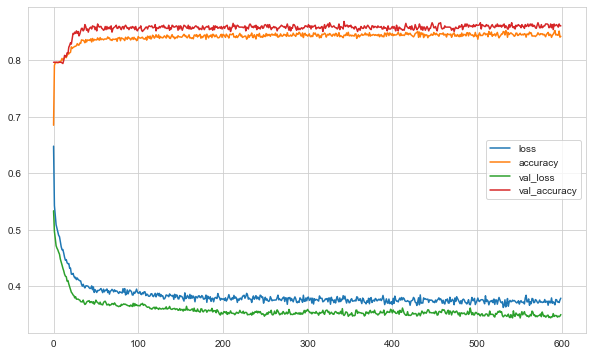

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [69]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3312828540802002
accuracy :  0.8610000014305115


In [70]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[776  20]
 [119  85]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.81      0.42      0.55       204

    accuracy                           0.86      1000
   macro avg       0.84      0.70      0.73      1000
weighted avg       0.86      0.86      0.84      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [71]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [72]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [73]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 2s 4ms/step - loss: 0.6357 - accuracy: 0.6952 - val_loss: 0.5134 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5420 - accuracy: 0.7909 - val_loss: 0.4853 - val_accuracy: 0.7967
Epoch 3/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5192 - accuracy: 0.7956 - val_loss: 0.4817 - val_accuracy: 0.7967
Epoch 4/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5095 - accuracy: 0.7954 - val_loss: 0.4764 - val_accuracy: 0.7967
Epoch 5/600
254/254 [==============================] - 1s 4ms/step - loss: 0.5070 - accuracy: 0.7962 - val_loss: 0.4755 - val_accuracy: 0.7967
Epoch 6/600
254/254 [==============================] - 1s 4ms/step - loss: 0.4976 - accuracy: 0.7960 - val_loss: 0.4684 - val_accuracy: 0.7967
Epoch 7/600
254/254 [==============================] - 1s 3ms/step - loss: 0.4889 - accuracy: 0.7957 - val_loss: 0.4584 - val_accuracy: 0.7967

Epoch 58/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3943 - accuracy: 0.8354 - val_loss: 0.3709 - val_accuracy: 0.8567
Epoch 59/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3983 - accuracy: 0.8356 - val_loss: 0.3708 - val_accuracy: 0.8556
Epoch 60/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3984 - accuracy: 0.8319 - val_loss: 0.3707 - val_accuracy: 0.8600
Epoch 61/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3958 - accuracy: 0.8370 - val_loss: 0.3668 - val_accuracy: 0.8556
Epoch 62/600
254/254 [==============================] - 1s 4ms/step - loss: 0.4007 - accuracy: 0.8374 - val_loss: 0.3688 - val_accuracy: 0.8567
Epoch 63/600
254/254 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8362 - val_loss: 0.3667 - val_accuracy: 0.8578
Epoch 64/600
254/254 [==============================] - 1s 4ms/step - loss: 0.3959 - accuracy: 0.8356 - val_loss: 0.3687 - val_accuracy:

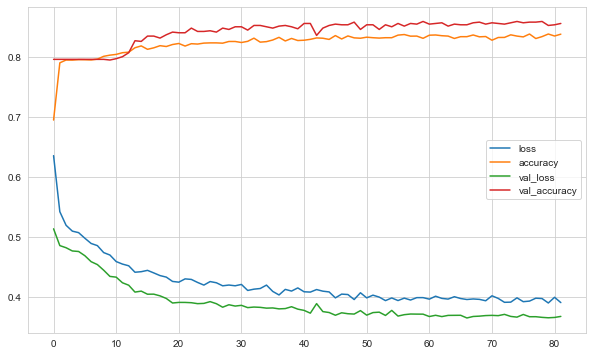

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [75]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3461483120918274
accuracy :  0.8600000143051147


In [76]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[781  15]
 [125  79]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       796
           1       0.84      0.39      0.53       204

    accuracy                           0.86      1000
   macro avg       0.85      0.68      0.72      1000
weighted avg       0.86      0.86      0.84      1000



#### Monitor the "val_recall" as metric

In [77]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [78]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [79]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/200
57/57 [==============================] - 2s 12ms/step - loss: 0.5164 - recall: 6.7340e-04 - val_loss: 0.4960 - val_recall: 0.0000e+00
Epoch 2/200
57/57 [==============================] - 0s 3ms/step - loss: 0.4858 - recall: 0.0000e+00 - val_loss: 0.4814 - val_recall: 0.0000e+00
Epoch 3/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4703 - recall: 6.7340e-04 - val_loss: 0.4730 - val_recall: 0.0303
Epoch 4/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4605 - recall: 0.0162 - val_loss: 0.4658 - val_recall: 0.0727
Epoch 5/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4529 - recall: 0.0552 - val_loss: 0.4604 - val_recall: 0.0970
Epoch 6/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4474 - recall: 0.0795 - val_loss: 0.4559 - val_recall: 0.1273
Epoch 7/200
57/57 [==============================] - 0s 4ms/step - loss: 0.4420 - recall: 0.1071 - val_loss: 0.4501 - val_recall: 0.1333
Epoch 8/200
57/57 [=

57/57 [==============================] - 0s 4ms/step - loss: 0.3412 - recall: 0.4572 - val_loss: 0.3648 - val_recall: 0.5273
Epoch 61/200
57/57 [==============================] - 0s 4ms/step - loss: 0.3411 - recall: 0.4572 - val_loss: 0.3571 - val_recall: 0.4848
Epoch 62/200
57/57 [==============================] - 0s 4ms/step - loss: 0.3405 - recall: 0.4593 - val_loss: 0.3584 - val_recall: 0.5030
Epoch 63/200
57/57 [==============================] - 0s 5ms/step - loss: 0.3400 - recall: 0.4667 - val_loss: 0.3562 - val_recall: 0.4303
Epoch 64/200
57/57 [==============================] - 0s 5ms/step - loss: 0.3400 - recall: 0.4620 - val_loss: 0.3552 - val_recall: 0.4667
Epoch 65/200
57/57 [==============================] - 0s 5ms/step - loss: 0.3392 - recall: 0.4633 - val_loss: 0.3559 - val_recall: 0.4727
Epoch 66/200
57/57 [==============================] - 0s 4ms/step - loss: 0.3397 - recall: 0.4660 - val_loss: 0.3585 - val_recall: 0.3879
Epoch 67/200
57/57 [===========================

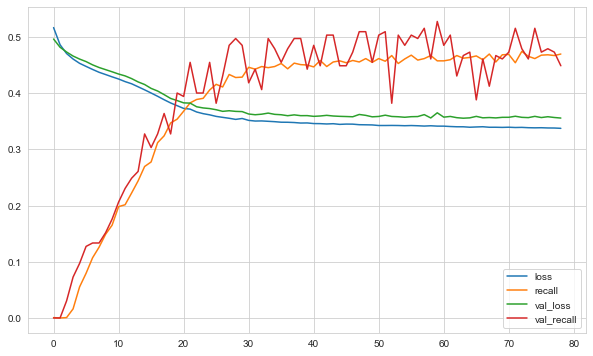

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [81]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3408057987689972
recall :  0.46078431606292725


In [82]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[773  23]
 [110  94]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       796
           1       0.80      0.46      0.59       204

    accuracy                           0.87      1000
   macro avg       0.84      0.72      0.75      1000
weighted avg       0.86      0.87      0.85      1000



## Optuna

In [83]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.regularizers import l1, l2, L1L2

In [84]:
import optuna

In [85]:
early_stop = EarlyStopping(monitor="accuracy", mode="auto", verbose=1, patience=20, restore_best_weights=True)

In [86]:
trial_metric = "accuracy"
batch_size = 64

# batch_size = 64 model biraz daha hızlı eğitilsin diye batch_size'ı 32'den 64'e çıkardık

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 32, 64) # ilk layerda kaç tane nöron olsun 64'ten 128'e kadar dene diyoruz
    n_units2 = trial.suggest_int("n_units2", 16, 32)  # ama dikkat hepsini denemeyecek en iyiye doğru bir yönelimi olacak. 
    n_units3 = trial.suggest_int("n_units3", 1, 8)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 2) # daha var bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=200,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [87]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=8) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-17 21:08:22,497] A new study created in memory with name: no-name-0bd593c4-9e7b-46c0-afdc-7f468ac48eee


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-05-17 21:08:35,403] Trial 0 finished with value: 0.7960000038146973 and parameters: {'n_units1': 55, 'n_units2': 16, 'n_units3': 2, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.08602615045250492, 'regularizer1': 3.746692494560682e-05, 'regularizer2': 0.00046559312982424336, 'dropout': 0.5, 'w0': 1.495979088885667, 'w1': 0.34257602979549523}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 2.
Epoch 22: early stopping


[I 2023-05-17 21:08:48,925] Trial 1 finished with value: 0.7960000038146973 and parameters: {'n_units1': 52, 'n_units2': 26, 'n_units3': 1, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.019756938638852844, 'regularizer1': 0.000646982025775652, 'regularizer2': 0.00036990773140932335, 'dropout': 0.5, 'w0': 0.2710947579559328, 'w1': 0.012014016283581983}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-05-17 21:09:01,630] Trial 2 finished with value: 0.7960000038146973 and parameters: {'n_units1': 56, 'n_units2': 32, 'n_units3': 1, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.019062514493648767, 'regularizer1': 0.0006376810536017414, 'regularizer2': 0.00011853891311667405, 'dropout': 0.5, 'w0': 0.4279928040090105, 'w1': 0.7039863483253498}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 4.
Epoch 24: early stopping


[I 2023-05-17 21:09:16,607] Trial 3 finished with value: 0.20399999618530273 and parameters: {'n_units1': 59, 'n_units2': 32, 'n_units3': 8, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0635002728768019, 'regularizer1': 8.692134303758083e-05, 'regularizer2': 0.00012840749062391888, 'dropout': 0.5, 'w0': 0.1484473155080286, 'w1': 1.2479640556035432}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 46.
Epoch 66: early stopping


[I 2023-05-17 21:09:48,239] Trial 4 finished with value: 0.5 and parameters: {'n_units1': 49, 'n_units2': 18, 'n_units3': 4, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.01011294637569135, 'regularizer1': 3.824273464863306e-05, 'regularizer2': 0.00030906783421135413, 'dropout': 0, 'w0': 0.010800458800988573, 'w1': 0.35947411708191446}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 2.
Epoch 22: early stopping


[I 2023-05-17 21:10:00,430] Trial 5 finished with value: 0.7960000038146973 and parameters: {'n_units1': 62, 'n_units2': 32, 'n_units3': 6, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0592207964639562, 'regularizer1': 0.0008861340133538881, 'regularizer2': 0.0001742069232360871, 'dropout': 0, 'w0': 1.0919454038044611, 'w1': 0.10566551998837229}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 2.
Epoch 22: early stopping


[I 2023-05-17 21:10:13,185] Trial 6 finished with value: 0.7960000038146973 and parameters: {'n_units1': 61, 'n_units2': 24, 'n_units3': 4, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.001592564698169033, 'regularizer1': 4.5833832396238885e-05, 'regularizer2': 6.838172561166249e-05, 'dropout': 0, 'w0': 0.05914319034975482, 'w1': 0.017465922307118156}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 2.
Epoch 22: early stopping


[I 2023-05-17 21:10:25,524] Trial 7 finished with value: 0.7960000038146973 and parameters: {'n_units1': 53, 'n_units2': 19, 'n_units3': 2, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.024876752912755214, 'regularizer1': 2.9759923040819228e-05, 'regularizer2': 0.0002498360355448381, 'dropout': 0, 'w0': 0.7833835902232879, 'w1': 0.16253276924933277}. Best is trial 0 with value: 0.7960000038146973.


{'n_units1': 55,
 'n_units2': 16,
 'n_units3': 2,
 'optimizer': keras.optimizers.optimizer_v2.adadelta.Adadelta,
 'learning_rate': 0.08602615045250492,
 'regularizer1': 3.746692494560682e-05,
 'regularizer2': 0.00046559312982424336,
 'dropout': 0.5,
 'w0': 1.495979088885667,
 'w1': 0.34257602979549523}

In [88]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)


model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
127/127 [==============================] - 3s 9ms/step - loss: 0.7252 - Accuracy: 0.7156 - val_loss: 0.6858 - val_Accuracy: 0.7867
Epoch 2/500
127/127 [==============================] - 1s 4ms/step - loss: 0.6957 - Accuracy: 0.7522 - val_loss: 0.6429 - val_Accuracy: 0.7967
Epoch 3/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6736 - Accuracy: 0.7680 - val_loss: 0.6124 - val_Accuracy: 0.7967
Epoch 4/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6613 - Accuracy: 0.7778 - val_loss: 0.5939 - val_Accuracy: 0.7967
Epoch 5/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6531 - Accuracy: 0.7868 - val_loss: 0.5843 - val_Accuracy: 0.7967
Epoch 6/500
127/127 [==============================] - 1s 4ms/step - loss: 0.6490 - Accuracy: 0.7912 - val_loss: 0.5780 - val_Accuracy: 0.7967
Epoch 7/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6409 - Accuracy: 0.7899 - val_loss: 0.5717 - val_Accuracy: 0.7967

Epoch 23/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5728 - Accuracy: 0.7962 - val_loss: 0.5397 - val_Accuracy: 0.7967
Epoch 24/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5738 - Accuracy: 0.7963 - val_loss: 0.5390 - val_Accuracy: 0.7967
Epoch 25/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5711 - Accuracy: 0.7963 - val_loss: 0.5379 - val_Accuracy: 0.7967
Epoch 26/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5680 - Accuracy: 0.7963 - val_loss: 0.5368 - val_Accuracy: 0.7967
Epoch 27/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5654 - Accuracy: 0.7963 - val_loss: 0.5353 - val_Accuracy: 0.7967
Epoch 28/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5649 - Accuracy: 0.7963 - val_loss: 0.5342 - val_Accuracy: 0.7967
Epoch 29/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5651 - Accuracy: 0.7963 - val_loss: 0.5335 - val_Accuracy:

Epoch 45/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5363 - Accuracy: 0.7963 - val_loss: 0.5170 - val_Accuracy: 0.7967
Epoch 46/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5343 - Accuracy: 0.7963 - val_loss: 0.5163 - val_Accuracy: 0.7967
Epoch 47/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5329 - Accuracy: 0.7963 - val_loss: 0.5154 - val_Accuracy: 0.7967
Epoch 48/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5351 - Accuracy: 0.7963 - val_loss: 0.5150 - val_Accuracy: 0.7967
Epoch 49/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5344 - Accuracy: 0.7963 - val_loss: 0.5146 - val_Accuracy: 0.7967
Epoch 50/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5347 - Accuracy: 0.7963 - val_loss: 0.5145 - val_Accuracy: 0.7967
Epoch 51/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5283 - Accuracy: 0.7963 - val_loss: 0.5133 - val_Accuracy:

Epoch 67/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5212 - Accuracy: 0.7963 - val_loss: 0.5060 - val_Accuracy: 0.7967
Epoch 68/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5197 - Accuracy: 0.7963 - val_loss: 0.5059 - val_Accuracy: 0.7967
Epoch 69/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5196 - Accuracy: 0.7963 - val_loss: 0.5055 - val_Accuracy: 0.7967
Epoch 70/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5187 - Accuracy: 0.7963 - val_loss: 0.5052 - val_Accuracy: 0.7967
Epoch 71/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5154 - Accuracy: 0.7963 - val_loss: 0.5045 - val_Accuracy: 0.7967
Epoch 72/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5181 - Accuracy: 0.7963 - val_loss: 0.5045 - val_Accuracy: 0.7967
Epoch 73/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5181 - Accuracy: 0.7963 - val_loss: 0.5041 - val_Accuracy:

Epoch 89/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5103 - Accuracy: 0.7963 - val_loss: 0.5008 - val_Accuracy: 0.7967
Epoch 90/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5135 - Accuracy: 0.7963 - val_loss: 0.5009 - val_Accuracy: 0.7967
Epoch 91/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5126 - Accuracy: 0.7963 - val_loss: 0.5008 - val_Accuracy: 0.7967
Epoch 92/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5114 - Accuracy: 0.7963 - val_loss: 0.5005 - val_Accuracy: 0.7967
Epoch 93/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5134 - Accuracy: 0.7963 - val_loss: 0.5005 - val_Accuracy: 0.7967
Epoch 94/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5087 - Accuracy: 0.7963 - val_loss: 0.4999 - val_Accuracy: 0.7967
Epoch 95/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5125 - Accuracy: 0.7963 - val_loss: 0.5002 - val_Accuracy:

127/127 [==============================] - 1s 4ms/step - loss: 0.5084 - Accuracy: 0.7963 - val_loss: 0.4981 - val_Accuracy: 0.7967
Epoch 111/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5070 - Accuracy: 0.7963 - val_loss: 0.4977 - val_Accuracy: 0.7967
Epoch 112/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5101 - Accuracy: 0.7963 - val_loss: 0.4977 - val_Accuracy: 0.7967
Epoch 113/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5065 - Accuracy: 0.7963 - val_loss: 0.4973 - val_Accuracy: 0.7967
Epoch 114/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5087 - Accuracy: 0.7963 - val_loss: 0.4972 - val_Accuracy: 0.7967
Epoch 115/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5063 - Accuracy: 0.7963 - val_loss: 0.4969 - val_Accuracy: 0.7967
Epoch 116/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5073 - Accuracy: 0.7963 - val_loss: 0.4969 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 4ms/step - loss: 0.5062 - Accuracy: 0.7963 - val_loss: 0.4953 - val_Accuracy: 0.7967
Epoch 133/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5070 - Accuracy: 0.7963 - val_loss: 0.4952 - val_Accuracy: 0.7967
Epoch 134/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5046 - Accuracy: 0.7963 - val_loss: 0.4945 - val_Accuracy: 0.7967
Epoch 135/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5040 - Accuracy: 0.7963 - val_loss: 0.4940 - val_Accuracy: 0.7967
Epoch 136/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5049 - Accuracy: 0.7963 - val_loss: 0.4938 - val_Accuracy: 0.7967
Epoch 137/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5055 - Accuracy: 0.7963 - val_loss: 0.4939 - val_Accuracy: 0.7967
Epoch 138/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5039 - Accuracy: 0.7963 - val_loss: 0.4937 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 4ms/step - loss: 0.5036 - Accuracy: 0.7963 - val_loss: 0.4925 - val_Accuracy: 0.7967
Epoch 155/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5016 - Accuracy: 0.7963 - val_loss: 0.4918 - val_Accuracy: 0.7967
Epoch 156/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5041 - Accuracy: 0.7963 - val_loss: 0.4917 - val_Accuracy: 0.7967
Epoch 157/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5023 - Accuracy: 0.7963 - val_loss: 0.4918 - val_Accuracy: 0.7967
Epoch 158/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5036 - Accuracy: 0.7963 - val_loss: 0.4919 - val_Accuracy: 0.7967
Epoch 159/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4993 - Accuracy: 0.7963 - val_loss: 0.4912 - val_Accuracy: 0.7967
Epoch 160/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4999 - Accuracy: 0.7963 - val_loss: 0.4906 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.5021 - Accuracy: 0.7963 - val_loss: 0.4895 - val_Accuracy: 0.7967
Epoch 177/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5002 - Accuracy: 0.7963 - val_loss: 0.4894 - val_Accuracy: 0.7967
Epoch 178/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4992 - Accuracy: 0.7963 - val_loss: 0.4889 - val_Accuracy: 0.7967
Epoch 179/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5010 - Accuracy: 0.7963 - val_loss: 0.4890 - val_Accuracy: 0.7967
Epoch 180/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5007 - Accuracy: 0.7963 - val_loss: 0.4891 - val_Accuracy: 0.7967
Epoch 181/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5016 - Accuracy: 0.7963 - val_loss: 0.4893 - val_Accuracy: 0.7967
Epoch 182/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5005 - Accuracy: 0.7963 - val_loss: 0.4890 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 4ms/step - loss: 0.4993 - Accuracy: 0.7963 - val_loss: 0.4869 - val_Accuracy: 0.7967
Epoch 199/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4989 - Accuracy: 0.7963 - val_loss: 0.4872 - val_Accuracy: 0.7967
Epoch 200/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4979 - Accuracy: 0.7963 - val_loss: 0.4868 - val_Accuracy: 0.7967
Epoch 201/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4999 - Accuracy: 0.7963 - val_loss: 0.4869 - val_Accuracy: 0.7967
Epoch 202/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4968 - Accuracy: 0.7963 - val_loss: 0.4865 - val_Accuracy: 0.7967
Epoch 203/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4977 - Accuracy: 0.7963 - val_loss: 0.4858 - val_Accuracy: 0.7967
Epoch 204/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4958 - Accuracy: 0.7963 - val_loss: 0.4852 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4976 - Accuracy: 0.7963 - val_loss: 0.4845 - val_Accuracy: 0.7967
Epoch 221/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4967 - Accuracy: 0.7963 - val_loss: 0.4844 - val_Accuracy: 0.7967
Epoch 222/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4969 - Accuracy: 0.7963 - val_loss: 0.4848 - val_Accuracy: 0.7967
Epoch 223/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4979 - Accuracy: 0.7963 - val_loss: 0.4850 - val_Accuracy: 0.7967
Epoch 224/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4983 - Accuracy: 0.7963 - val_loss: 0.4846 - val_Accuracy: 0.7967
Epoch 225/500
127/127 [==============================] - 1s 7ms/step - loss: 0.4981 - Accuracy: 0.7963 - val_loss: 0.4850 - val_Accuracy: 0.7967
Epoch 226/500
127/127 [==============================] - 1s 9ms/step - loss: 0.4950 - Accuracy: 0.7963 - val_loss: 0.4840 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 6ms/step - loss: 0.4952 - Accuracy: 0.7963 - val_loss: 0.4827 - val_Accuracy: 0.7967
Epoch 243/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4949 - Accuracy: 0.7963 - val_loss: 0.4824 - val_Accuracy: 0.7967
Epoch 244/500
127/127 [==============================] - 1s 8ms/step - loss: 0.4978 - Accuracy: 0.7963 - val_loss: 0.4830 - val_Accuracy: 0.7967
Epoch 245/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4960 - Accuracy: 0.7963 - val_loss: 0.4825 - val_Accuracy: 0.7967
Epoch 246/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4972 - Accuracy: 0.7963 - val_loss: 0.4824 - val_Accuracy: 0.7967
Epoch 247/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4967 - Accuracy: 0.7963 - val_loss: 0.4832 - val_Accuracy: 0.7967
Epoch 248/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4967 - Accuracy: 0.7963 - val_loss: 0.4828 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4952 - Accuracy: 0.7963 - val_loss: 0.4811 - val_Accuracy: 0.7967
Epoch 265/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4953 - Accuracy: 0.7963 - val_loss: 0.4811 - val_Accuracy: 0.7967
Epoch 266/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4955 - Accuracy: 0.7963 - val_loss: 0.4811 - val_Accuracy: 0.7967
Epoch 267/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4944 - Accuracy: 0.7963 - val_loss: 0.4808 - val_Accuracy: 0.7967
Epoch 268/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4961 - Accuracy: 0.7963 - val_loss: 0.4814 - val_Accuracy: 0.7967
Epoch 269/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4969 - Accuracy: 0.7963 - val_loss: 0.4818 - val_Accuracy: 0.7967
Epoch 270/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4940 - Accuracy: 0.7963 - val_loss: 0.4809 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4931 - Accuracy: 0.7963 - val_loss: 0.4793 - val_Accuracy: 0.7967
Epoch 287/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4943 - Accuracy: 0.7963 - val_loss: 0.4794 - val_Accuracy: 0.7967
Epoch 288/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4932 - Accuracy: 0.7963 - val_loss: 0.4790 - val_Accuracy: 0.7967
Epoch 289/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4930 - Accuracy: 0.7963 - val_loss: 0.4791 - val_Accuracy: 0.7967
Epoch 290/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4919 - Accuracy: 0.7963 - val_loss: 0.4786 - val_Accuracy: 0.7967
Epoch 291/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4944 - Accuracy: 0.7963 - val_loss: 0.4781 - val_Accuracy: 0.7967
Epoch 292/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4937 - Accuracy: 0.7963 - val_loss: 0.4784 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4932 - Accuracy: 0.7963 - val_loss: 0.4776 - val_Accuracy: 0.7967
Epoch 309/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4941 - Accuracy: 0.7963 - val_loss: 0.4783 - val_Accuracy: 0.7967
Epoch 310/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4926 - Accuracy: 0.7963 - val_loss: 0.4776 - val_Accuracy: 0.7967
Epoch 311/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4958 - Accuracy: 0.7963 - val_loss: 0.4788 - val_Accuracy: 0.7967
Epoch 312/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4926 - Accuracy: 0.7963 - val_loss: 0.4783 - val_Accuracy: 0.7967
Epoch 313/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4915 - Accuracy: 0.7963 - val_loss: 0.4772 - val_Accuracy: 0.7967
Epoch 314/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4908 - Accuracy: 0.7963 - val_loss: 0.4760 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4905 - Accuracy: 0.7963 - val_loss: 0.4761 - val_Accuracy: 0.7967
Epoch 331/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4925 - Accuracy: 0.7963 - val_loss: 0.4760 - val_Accuracy: 0.7967
Epoch 332/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4948 - Accuracy: 0.7963 - val_loss: 0.4764 - val_Accuracy: 0.7967
Epoch 333/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4938 - Accuracy: 0.7963 - val_loss: 0.4763 - val_Accuracy: 0.7967
Epoch 334/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4891 - Accuracy: 0.7963 - val_loss: 0.4749 - val_Accuracy: 0.7967
Epoch 335/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4939 - Accuracy: 0.7963 - val_loss: 0.4753 - val_Accuracy: 0.7967
Epoch 336/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4920 - Accuracy: 0.7963 - val_loss: 0.4748 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4884 - Accuracy: 0.7963 - val_loss: 0.4722 - val_Accuracy: 0.7967
Epoch 353/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4913 - Accuracy: 0.7963 - val_loss: 0.4738 - val_Accuracy: 0.7967
Epoch 354/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4931 - Accuracy: 0.7963 - val_loss: 0.4749 - val_Accuracy: 0.7967
Epoch 355/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4943 - Accuracy: 0.7963 - val_loss: 0.4748 - val_Accuracy: 0.7967
Epoch 356/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4892 - Accuracy: 0.7963 - val_loss: 0.4735 - val_Accuracy: 0.7967
Epoch 357/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4905 - Accuracy: 0.7963 - val_loss: 0.4737 - val_Accuracy: 0.7967
Epoch 358/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4940 - Accuracy: 0.7963 - val_loss: 0.4755 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4896 - Accuracy: 0.7963 - val_loss: 0.4715 - val_Accuracy: 0.7967
Epoch 375/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4930 - Accuracy: 0.7963 - val_loss: 0.4722 - val_Accuracy: 0.7967
Epoch 376/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4911 - Accuracy: 0.7963 - val_loss: 0.4722 - val_Accuracy: 0.7967
Epoch 377/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4904 - Accuracy: 0.7963 - val_loss: 0.4728 - val_Accuracy: 0.7967
Epoch 378/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4915 - Accuracy: 0.7963 - val_loss: 0.4734 - val_Accuracy: 0.7967
Epoch 379/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4906 - Accuracy: 0.7963 - val_loss: 0.4726 - val_Accuracy: 0.7967
Epoch 380/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4878 - Accuracy: 0.7963 - val_loss: 0.4716 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4867 - Accuracy: 0.7963 - val_loss: 0.4703 - val_Accuracy: 0.7967
Epoch 397/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4893 - Accuracy: 0.7963 - val_loss: 0.4709 - val_Accuracy: 0.7967
Epoch 398/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4858 - Accuracy: 0.7963 - val_loss: 0.4704 - val_Accuracy: 0.7967
Epoch 399/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4871 - Accuracy: 0.7963 - val_loss: 0.4697 - val_Accuracy: 0.7967
Epoch 400/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4881 - Accuracy: 0.7963 - val_loss: 0.4699 - val_Accuracy: 0.7967
Epoch 401/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4870 - Accuracy: 0.7963 - val_loss: 0.4705 - val_Accuracy: 0.7967
Epoch 402/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4857 - Accuracy: 0.7963 - val_loss: 0.4701 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 4ms/step - loss: 0.4903 - Accuracy: 0.7963 - val_loss: 0.4694 - val_Accuracy: 0.7967
Epoch 419/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4894 - Accuracy: 0.7963 - val_loss: 0.4702 - val_Accuracy: 0.7967
Epoch 420/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4890 - Accuracy: 0.7963 - val_loss: 0.4695 - val_Accuracy: 0.7967
Epoch 421/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4890 - Accuracy: 0.7963 - val_loss: 0.4695 - val_Accuracy: 0.7967
Epoch 422/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4876 - Accuracy: 0.7963 - val_loss: 0.4693 - val_Accuracy: 0.7967
Epoch 423/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4884 - Accuracy: 0.7963 - val_loss: 0.4704 - val_Accuracy: 0.7967
Epoch 424/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4872 - Accuracy: 0.7963 - val_loss: 0.4703 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4855 - Accuracy: 0.7963 - val_loss: 0.4683 - val_Accuracy: 0.7967
Epoch 441/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4868 - Accuracy: 0.7963 - val_loss: 0.4679 - val_Accuracy: 0.7967
Epoch 442/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4863 - Accuracy: 0.7963 - val_loss: 0.4675 - val_Accuracy: 0.7967
Epoch 443/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4889 - Accuracy: 0.7963 - val_loss: 0.4691 - val_Accuracy: 0.7967
Epoch 444/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4844 - Accuracy: 0.7963 - val_loss: 0.4679 - val_Accuracy: 0.7967
Epoch 445/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4868 - Accuracy: 0.7963 - val_loss: 0.4670 - val_Accuracy: 0.7967
Epoch 446/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4874 - Accuracy: 0.7963 - val_loss: 0.4685 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4869 - Accuracy: 0.7963 - val_loss: 0.4671 - val_Accuracy: 0.7967
Epoch 463/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4865 - Accuracy: 0.7963 - val_loss: 0.4663 - val_Accuracy: 0.7967
Epoch 464/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4871 - Accuracy: 0.7963 - val_loss: 0.4672 - val_Accuracy: 0.7967
Epoch 465/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4886 - Accuracy: 0.7963 - val_loss: 0.4681 - val_Accuracy: 0.7967
Epoch 466/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4861 - Accuracy: 0.7963 - val_loss: 0.4671 - val_Accuracy: 0.7967
Epoch 467/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4867 - Accuracy: 0.7963 - val_loss: 0.4671 - val_Accuracy: 0.7967
Epoch 468/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4868 - Accuracy: 0.7963 - val_loss: 0.4673 - val_Accuracy: 0.7967

127/127 [==============================] - 1s 5ms/step - loss: 0.4891 - Accuracy: 0.7963 - val_loss: 0.4664 - val_Accuracy: 0.7967
Epoch 485/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4877 - Accuracy: 0.7963 - val_loss: 0.4668 - val_Accuracy: 0.7967
Epoch 486/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4849 - Accuracy: 0.7963 - val_loss: 0.4654 - val_Accuracy: 0.7967
Epoch 487/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4884 - Accuracy: 0.7963 - val_loss: 0.4662 - val_Accuracy: 0.7967
Epoch 488/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4889 - Accuracy: 0.7963 - val_loss: 0.4664 - val_Accuracy: 0.7967
Epoch 489/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4844 - Accuracy: 0.7963 - val_loss: 0.4667 - val_Accuracy: 0.7967
Epoch 490/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4870 - Accuracy: 0.7963 - val_loss: 0.4659 - val_Accuracy: 0.7967

In [89]:
history = model.history.history

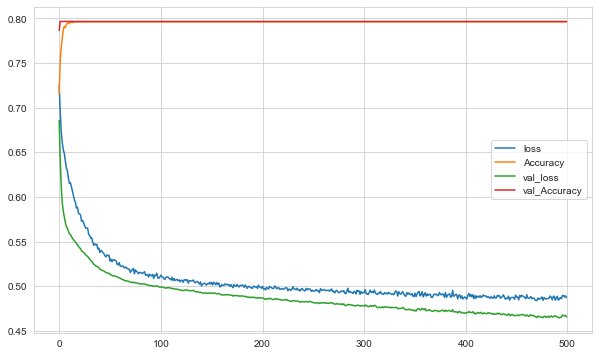

In [90]:
loss_df = pd.DataFrame(history)
loss_df.plot() #subplots=[["loss","val_loss"],["Accuracy","val_Accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [91]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 2ms/step


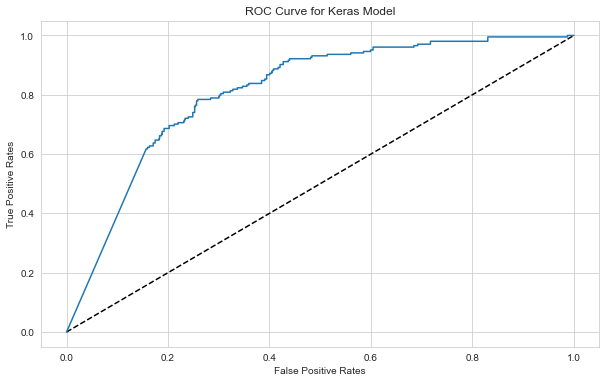

In [92]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve for Keras Model')
plt.show()

In [93]:
roc_auc_score(y_test, y_pred_proba)

0.8115762636712978

32/32 [==============================] - 0s 2ms/step


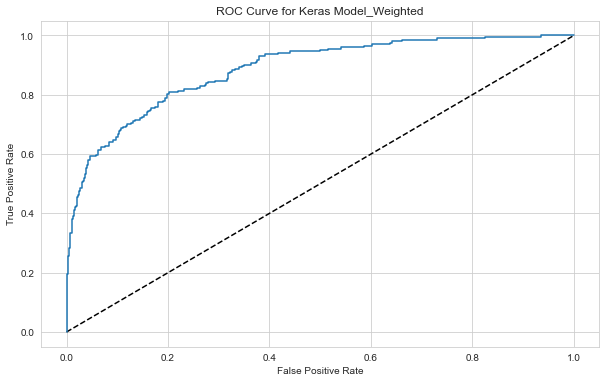

In [94]:
y_pred_proba = model_weighted.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Keras Model_Weighted')
plt.show()

In [95]:
roc_auc_score(y_test, y_pred_proba)

0.8843112621933196

In [96]:
model.save('model_churn.h5')

# Final Model and Model Deployment

In [97]:
import pickle

pickle.dump(scaler, open("scaler_exited", 'wb'))

In [98]:
final_model = Sequential()

final_model.add(Dense(40, activation = "relu"))
final_model.add(Dense(30, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))  

opt = Adam(learning_rate = 0.06268959668744448)

final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [99]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [100]:
class_weight = {0: 0.13629094883118786, 1: 0.16938474875924936}

In [101]:
final_model.fit(x = X_train, y = y_train, 
                validation_data = (X_test, y_test), 
                batch_size = 32, 
                epochs = 1000, 
                verbose = 1, 
                callbacks = [early_stop], 
                class_weight = class_weight)

Epoch 1/1000
254/254 [==============================] - 2s 4ms/step - loss: 0.0739 - accuracy: 0.7947 - val_loss: 0.4330 - val_accuracy: 0.7960
Epoch 2/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.7962 - val_loss: 0.4454 - val_accuracy: 0.8030
Epoch 3/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.8054 - val_loss: 0.4305 - val_accuracy: 0.7950
Epoch 4/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.0651 - accuracy: 0.8067 - val_loss: 0.4041 - val_accuracy: 0.8080
Epoch 5/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.0631 - accuracy: 0.8140 - val_loss: 0.3853 - val_accuracy: 0.8140
Epoch 6/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.8143 - val_loss: 0.3871 - val_accuracy: 0.8300
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.8169 - val_loss: 0.4087 - val_accuracy:

254/254 [==============================] - 1s 4ms/step - loss: 0.0562 - accuracy: 0.8485 - val_loss: 0.3394 - val_accuracy: 0.8560
Epoch 58/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.0566 - accuracy: 0.8468 - val_loss: 0.3571 - val_accuracy: 0.8530
Epoch 59/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.8449 - val_loss: 0.3569 - val_accuracy: 0.8550
Epoch 60/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.0569 - accuracy: 0.8467 - val_loss: 0.3619 - val_accuracy: 0.8380
Epoch 61/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.0571 - accuracy: 0.8423 - val_loss: 0.3565 - val_accuracy: 0.8490
Epoch 62/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.0566 - accuracy: 0.8459 - val_loss: 0.3938 - val_accuracy: 0.8350
Epoch 63/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.8473 - val_loss: 0.3403 - val_accuracy: 0.8550

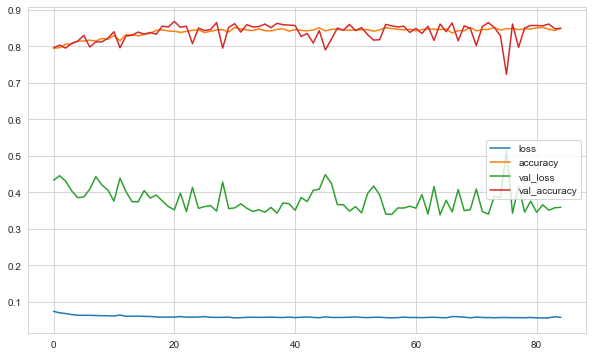

In [102]:
loss_df = pd.DataFrame(final_model.history.history)

loss_df.plot();

In [103]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[787   9]
 [142  62]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       796
           1       0.87      0.30      0.45       204

    accuracy                           0.85      1000
   macro avg       0.86      0.65      0.68      1000
weighted avg       0.85      0.85      0.82      1000



In [104]:
model.save('model_exited.h5')

## Prediction

In [105]:
from tensorflow.keras.models import load_model

In [106]:
model_exited = load_model('model_exited.h5')

scaler_exited = pickle.load(open("scaler_exited", "rb"))

In [107]:
num_column = df.shape[1]  # DataFrame'deki sütun sayısını alalım
target_column = 'Exited'  # Sona taşımak istediğimiz sütunun adı

# Sütunun mevcut indeksini alalım
target_column_index = df.columns.get_loc(target_column)

# Sütunu sona taşıyalım
df = df.iloc[:, [i for i in range(num_column) if i != target_column_index] + [target_column_index]]

# Sonucu gösterelim
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.000,1,1,1,101348.880,0,0,0,1
1,608,41,1,83807.860,1,0,1,112542.580,0,1,0,0
2,502,42,8,159660.800,3,1,0,113931.570,0,0,0,1
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,1,0
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,1,0
9997,709,36,7,0.000,1,0,1,42085.580,0,0,0,1
9998,772,42,3,75075.310,2,1,0,92888.520,1,0,1,1


In [108]:
random_ten_customer = df.sample(n=10, random_state=101).iloc[0:10, :11]

random_ten_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6676,619,52,8,0.000,2,1,1,123242.110,0,1,1
6421,616,23,8,73112.950,1,1,1,62733.050,0,0,1
9834,516,46,6,62212.290,1,0,1,171681.860,0,0,0
8492,494,28,9,114731.760,2,0,1,79479.740,0,0,1
9982,655,46,7,137145.120,1,1,0,115146.400,1,0,0
8844,695,35,7,0.000,2,1,0,160387.980,0,1,1
7247,582,40,3,110150.430,1,1,1,191757.650,1,0,0
5862,682,40,4,0.000,2,1,1,140745.910,0,0,1
3662,632,28,5,118890.810,1,0,1,145157.970,0,0,0
3457,657,36,8,188241.050,2,0,0,183058.510,0,1,1


In [109]:
random_ten_customer = scaler_exited.transform(random_ten_customer)

random_ten_customer

array([[0.538     , 0.45945946, 0.8       , 0.        , 0.33333333,
        1.        , 1.        , 0.6162115 , 0.        , 1.        ,
        1.        ],
       [0.532     , 0.06756757, 0.8       , 0.29140497, 0.        ,
        1.        , 1.        , 0.3136373 , 0.        , 0.        ,
        1.        ],
       [0.332     , 0.37837838, 0.6       , 0.2479584 , 0.        ,
        0.        , 1.        , 0.85843338, 0.        , 0.        ,
        0.        ],
       [0.288     , 0.13513514, 0.9       , 0.45728431, 0.33333333,
        0.        , 1.        , 0.39737875, 0.        , 0.        ,
        1.        ],
       [0.61      , 0.37837838, 0.7       , 0.54661684, 0.        ,
        1.        , 0.        , 0.57572908, 1.        , 0.        ,
        0.        ],
       [0.69      , 0.22972973, 0.7       , 0.        , 0.33333333,
        1.        , 0.        , 0.80195859, 0.        , 1.        ,
        1.        ],
       [0.464     , 0.2972973 , 0.3       , 0.43902459, 0.

In [110]:
prediction = pd.DataFrame(model_exited.predict(random_ten_customer) > 0.5, columns=['prediction']).astype("float64")
prediction

1/1 [==============================] - 0s 227ms/step


,prediction
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
5,0.000
6,0.000
7,0.000
8,0.000
9,0.000


In [111]:
actual = pd.DataFrame(df.sample(n=10, random_state=101)["Exited"]).rename({'Exited': 'actual'}, axis=1).astype("float64")
actual 

,actual
6676,0.000
6421,0.000
9834,1.000
8492,0.000
9982,1.000
8844,0.000
7247,1.000
5862,0.000
3662,0.000
3457,1.000


In [112]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

,actual,prediction
6676,0.000,0.000
6421,0.000,0.000
9834,1.000,0.000
8492,0.000,0.000
9982,1.000,0.000
8844,0.000,0.000
7247,1.000,0.000
5862,0.000,0.000
3662,0.000,0.000
3457,1.000,0.000


In [113]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

,actual,prediction,prediction_accuracy
6676,0.000,0.000,TRUE
6421,0.000,0.000,TRUE
9834,1.000,0.000,FALSE
8492,0.000,0.000,TRUE
9982,1.000,0.000,FALSE
8844,0.000,0.000,TRUE
7247,1.000,0.000,FALSE
5862,0.000,0.000,TRUE
3662,0.000,0.000,TRUE
3457,1.000,0.000,FALSE
